# Logistic Regression with Gradient Descent

Logistic regression is a predictive modelling algorithm that is used when the Y variable is binary categorical. That is, it can take only two values like 1 or 0. In this notebook we are going to discuss logistic regression for classification problems. For more information on logistic regression :[Logistic Regression](https://www.statisticssolutions.com/what-is-logistic-regression/).
We are not to make it from scratch so that the readers can have a better understanding of how this model works


# Dataset 
Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.

Attribute Information:

1. variance of Wavelet Transformed image (continuous) 
2. skewness of Wavelet Transformed image (continuous) 
3. curtosis of Wavelet Transformed image (continuous) 
4. entropy of image (continuous) 
5. class (integer) 

The dataset is preovided By [UCL Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/banknote+authentication)

# Libraries
We are goping to use the following libraries
1. Pandas for data Preparation
2. numpy for mathematical calculations.
3. sklearn for shuffling the data during data preparation.
4.  Matplotlib for data plottting

In [14]:
from sklearn.utils import shuffle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Data Preparation
Data Preparation of data preprocessing is a very important part of machine learning models. In this method we are going to perform the following steps.
1. shuffling the dataset to reduce variance and avoid overfitting.
2. adding a ones column so that we can have a hypothesis equation like: h(Q) = Q1*x1 + Q2*x2 + Q3*x3.. where x1=1.This is just to make our hypothesis equation complete by adding a bias term.

3. Generation of row vector of parameters(theta)

In [15]:
def dataPreparation():
    df = shuffle(pd.read_csv('/home/arpan/Downloads/data_banknote_authentication.txt',names=['image variance','skewness','kurtosis','entropy','y']))
    X = df[['image variance','skewness', 'kurtosis', 'entropy']].values
    Y = df[['y']].values
    one_column = np.ones((1372,1),dtype = 'float64' )
    X= np.append(one_column,X, axis=1).T
    theta = np.random.normal(size=5).reshape(1,5)
    return [X, Y, theta]

## Hypothesis
The hypothesis function in logistic regression is little bit different from linear regression. In this the predicted value need to be between 0  and 1 and to achieve that we need to pass our hypothesis equation to a sigmoid/ logistic function.


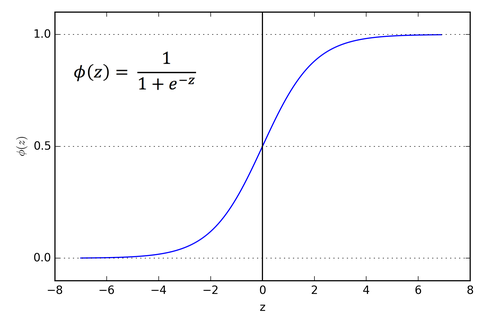

In [16]:
def hypothesis(theta,X):
    return np.exp((np.dot(theta,X)).T)/(1+np.exp((np.dot(theta,X))).T)

# Cost function 
Cost function can be defined as the difference between predicted value and the actual value. It tells how far are you from predicting the actual value.
For logistic regression we use log function to calculate the cost function.

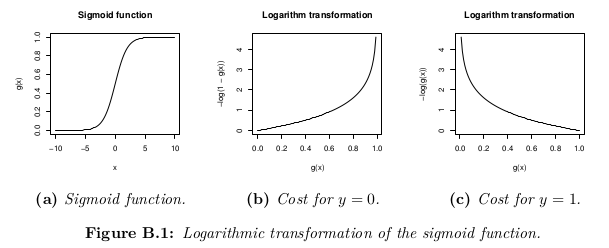

In [17]:
def cost_function(theta, X, Y):
    predictions = hypothesis(theta,X)
    cost = Y*(np.log(predictions.T)).T + (1-Y)*(np.log(1-predictions.T)).T
    average_cost = -np.sum(cost)/len(Y)
    return [average_cost,predictions]

# Gradient Descent 
Gradient Descent is the optimization algorithm for learning parameters. It works best with convex function because of single global minima.
Below method represent a sing step of gradient descent which needs to be repeated multiple times to get a set of prameters for which cost function is minimum.

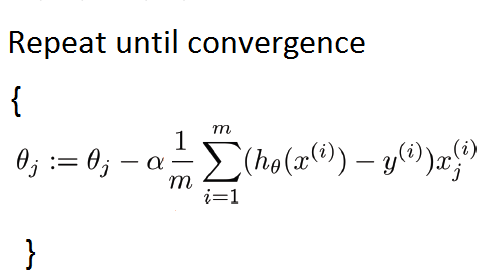

In [18]:
def single_step_descent(X, Y, theta, learning_rate):
    gradient = learning_rate*(np.dot(X,hypothesis(theta,X)-Y)/len(Y)).T
    theta = theta - gradient
    return theta

In [22]:
def gradient_descent(X,Y, theta, iterations,learning_rate):
    cost_history=[]
    for a in range(iterations):
        
        theta = single_step_descent(X,Y,theta,learning_rate)
        [cost,predictions]= cost_function(theta,X,Y)
        cost_history.append(cost)
    return [cost_history,theta,predictions] 

# Getting Started
In the below method we can fine tune our hyperparameters like learning_rate and number of iterations you need to perform.
This method  also saves a result.csv files which you can use to compare the difference between your predicted and actual values

In [23]:
def start():
    learning_rate = 0.001
    iterations = 1500    
    [X, Y, theta] = dataPreparation()
    [cost_history, theta, predictions] = gradient_descent(X,Y, theta,iterations, learning_rate)
    predictions[predictions>=0.5] = 1
    predictions[predictions<0.5] =0
    data = {'Predicted Value':predictions.reshape(1372,).astype('int32'), 
           'Actual Value': Y.reshape(1372,).astype('int32'),
           'Difference': abs(predictions.reshape(1372,).astype('int32') - Y.reshape(1372,).astype('int32'))}
    
    result = pd.DataFrame(data,columns=['Predicted Value','Actual Value', 'Difference'],index=range(len(Y)))
    result.to_csv('result.csv',sep=',')

    plt.plot(range(iterations),cost_history)
    plt.xlabel("# of iterations")
    plt.ylabel("J(Q)")
    plt.title("No. of iterations V/S Cost Function")
    

## Number of iterations V/S Cost Function
According to me, the best way to to predict whether your learning algorithm is working fine or not is by plotting a graph between number of iteration and Cost function. The graph should be decreasing because good algorithm should always reduce the cost function with each iteration.

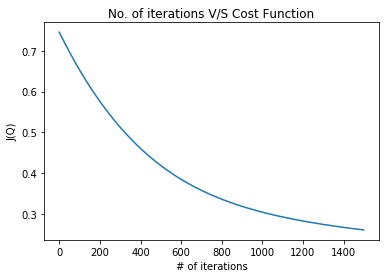

In [24]:
start()